Программа терминального наведения спускаемого аппарата в заданную точку поверхности.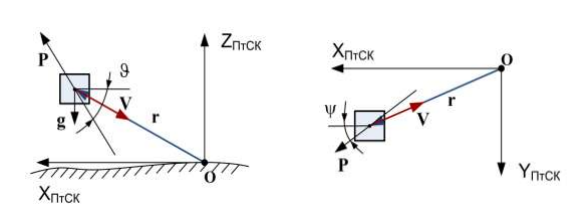


In [ ]:
#Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from matplotlib import pyplot as plt

In [ ]:
# В этом блоке считается начальная скорость Vecoloty в момент времени t_0 = 0. 

G = 6.67e-11 # гравитационная постоянная 
M = 7.35e+22 # масса Луны
R = 1731100  # радиус Луны
e = 0.49     # ексцентриситет 

T = ((29 * 24 + 12) * 60 + 44) * 60 + 2.8 # перевод периода оброщения луны вокруг свой оси в секунды

Vecoloty = (np.sqrt(G*M/(2 * R + 15 + 111) * (1 + e) / (1 - e)) - 2 * 3.1415 / T * (R + 15)) # Скорость в момент времени t_0 = 0

2029.6420343844932


In [ ]:
# Задаем начальное положение и конечное 

g = 1.62 # ускорение свободного падения на поверхности луны

Radius = [-100000, -30000, 15000] # радиус-вектор в момент времени t_0 = 0
RadiusT = [-300, -500, 2000]      # радиус-вектор в момент времени t_f = T
#RadiusT = [0, 0, 0]

Radius = np.array(Radius, dtype="float64")   # Переводим в массив
RadiusT = np.array(RadiusT, dtype="float64") # 

VecX = Vecoloty * np.cos(np.arctan((Radius[1] / Radius[0])))  # лень объяснять
VecY = Vecoloty * np.sin(np.arctan((Radius[1] / Radius[0])))  # 
VecZ = 0                                                      # 

Vecoloty = [VecX, VecY, VecZ] # делаем то же самое что и с радиус-вектором
VecolotyT = [200, 300, -500]  #
#VecolotyT = [0, 0, 0]

Vecoloty = np.array(Vecoloty, dtype="float64")
VecolotyT = np.array(VecolotyT, dtype="float64")

X = np.hstack([Radius, Vecoloty])
Xt = np.hstack([RadiusT, VecolotyT])



[1944.04449012  583.21334704    0.        ]
[-100000.          -30000.           15000.            1944.04449012
     583.21334704       0.        ]


In [ ]:
x = X[0]
y = X[1]
z = X[2]

xt = Xt[0]
yt = Xt[1]
zt = Xt[2]

vx = X[3]
vy = X[4]
vz = X[5]

vxt = Xt[3]
vyt = Xt[4]
vzt = Xt[5]

a2 = (vxt - vx) ** 2 + (vyt - vy) ** 2 + (vzt - vz) ** 2 - 4 * (vx ** 2 + vy ** 2 + vz ** 2 + (zt - z) * g) # поиск членов квадратного уравнения
a3 = 8 * ((xt - x) * vx + (yt - y) * vy + (zt - z) * vz)                                                    #
a4 = -4 * ((xt - x) ** 2 + (yt - y) ** 2 + (zt - z) ** 2)                                                   #

Ax = vxt - vx # сумарное ускорение
Ay = vyt - vy #
Az = vzt - vz #

-13021646.167492732 1688208235.2229867 -43917360000.0


In [ ]:
def timeN(a2, a3, a4):   # функция поиска оптимального времени полета
  return (-a3 - np.sqrt(a3 ** 2 - 4 * a2 * a4)) / (2 * a2)

def w(Ax, Ay, Az, TimeN): # функция поиска тормозного ускорения
  return np.sqrt(Ax ** 2 + Ay ** 2 + Az ** 2) / TimeN

def pitch(Ax, Ay, Az, Bx, By, Bz, TimeN): # функция поиска угла тангажа

  pitch0 = np.arctan((Az * TimeN - 3 * Bz) / (Ax * TimeN - 3 * Bx))
  pitchddt = -(3 / TimeN * (Az * TimeN - 2 * Bz) / (Ax * TimeN - 3 * Bx))

  return pitch0 + pitchddt * TimeN

def yaw(Ax, Ay, Az, Bx, By, Bz, TimeN): # функция поиска кгла рысканья 

  yaw0 = np.arctan((Ay * TimeN - 3 * By) / (Ax * TimeN - 3 * Bx))
  yawddt = -3 * (Ax * By - Ay * Bx) / ((Ax * TimeN - 3 * Bx) ** 2 + (Ay * TimeN - 3 * By) ** 2)

  return yaw0 + yawddt * TimeN

In [ ]:
Time = timeN(a2, a3, a4)
print(Time)

93.62242070804021


In [ ]:
Time = np.arange(1, abs(time)) 

In [ ]:
Bx = xt - x - vxt * Time                  # надо 
By = yt - y - vyt * Time
Bz = zt - z - (vzt - g * Time / 2) * Time

#print(Bx)
#print(By)
#print(Bz)

In [ ]:
X_acc = W(Ax, Ay, Az, Time) * np.cos(pitch(Ax, Ay, Az, Bx, By, Bz, Time)) * np.cos(yaw(Ax, Ay, Az, Bx, By, Bz, Time)) # ускорение в момент времени t
Y_acc = W(Ax, Ay, Az, Time) * np.cos(pitch(Ax, Ay, Az, Bx, By, Bz, Time)) * np.sin(yaw(Ax, Ay, Az, Bx, By, Bz, Time)) 
Z_acc = W(Ax, Ay, Az, Time) * np.sin(pitch(Ax, Ay, Az, Bx, By, Bz, Time)) - g

X_vec = X[3] + X_acc * Time # скорость в момент времени t
Y_vec = X[4] + Y_acc * Time 
Z_vec = X[5] + Z_acc * Time 

Xtt = X[0] + X_vec * Time + X_acc * Time ** 2 / 2 # координаты в момент времени t
Yt = X[1] + Y_vec * Time + Y_acc * Time ** 2 / 2
Zt = X[2] + Z_vec * Time + Z_acc * Time ** 2 / 2

In [ ]:
Xtt = np.append(np.array(X[0]), Xtt)
Yt = np.append(np.array(X[1]), Yt)
Zt = np.append(np.array(X[2]), Zt)

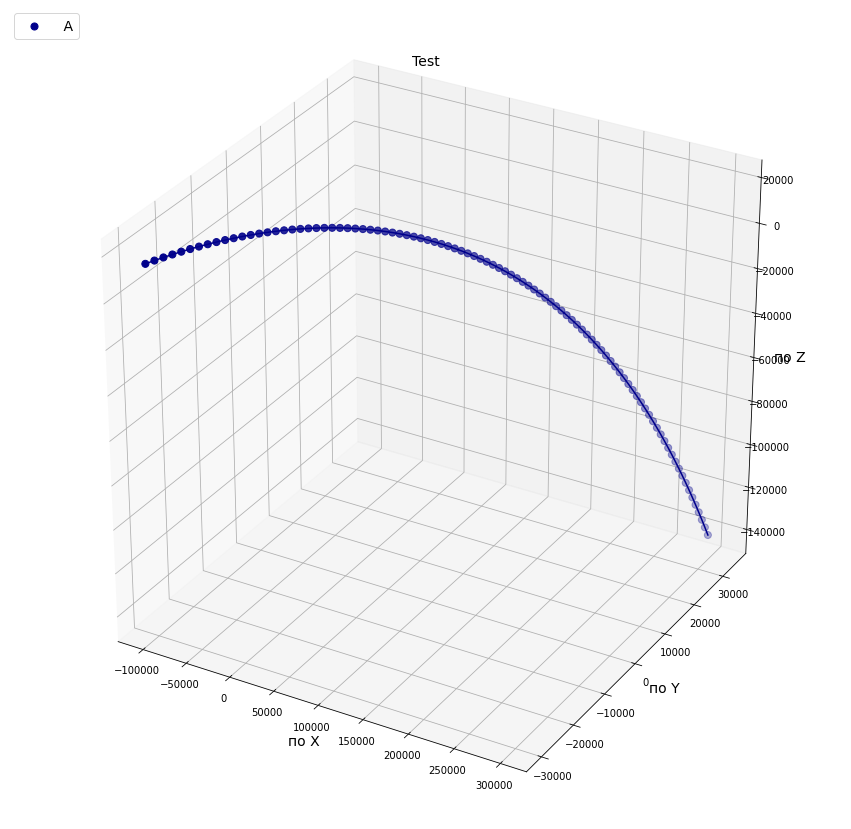

In [ ]:
#Cоздаем график
fig = plt.figure(figsize = (15,15))

#Задаем 3 оси пространства
ax = fig.add_subplot(111,projection="3d")

#Plot the orbits
ax.plot(Xtt, Yt, Zt, color="darkblue")

#Plot the final positions of the stars
ax.scatter(Xtt, Yt, Zt, color="darkblue", marker="o", s=50, label=" А")

#Add a few more bells and whistles
ax.set_xlabel("по X",fontsize=14)
ax.set_ylabel("по Y",fontsize=14)
ax.set_zlabel("по Z",fontsize=14)
ax.set_title("Test",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

Text(0, 0.5, 'Z')

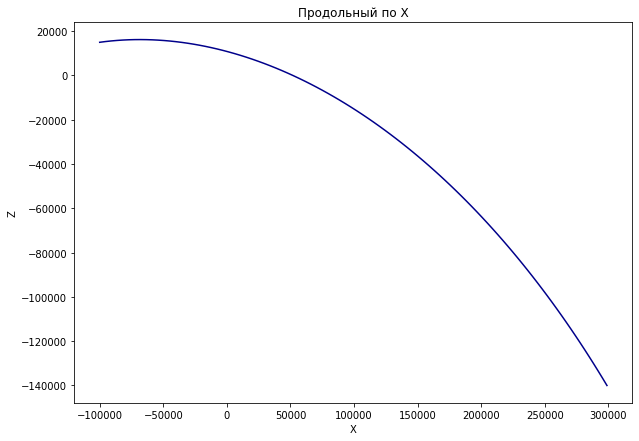

In [ ]:
plt.figure(figsize=(10,7)) # 10 is width, 7 is height
plt.plot(Xtt, Zt, 'darkblue', label='GreenDots')
plt.title('Продольный по X')  
plt.xlabel('X')
plt.ylabel('Z')

Text(0, 0.5, 'Z')

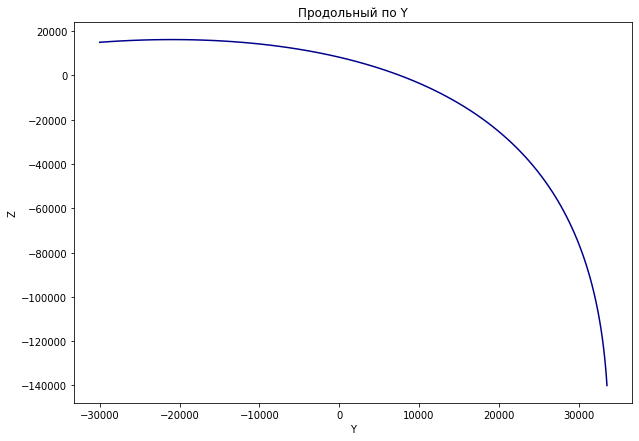

In [ ]:
plt.figure(figsize=(10,7)) # 10 is width, 7 is height
plt.plot(Yt, Zt, 'darkblue', label='GreenDots')
plt.title('Продольный по Y')  
plt.xlabel('Y')
plt.ylabel('Z')

array([195.20945454, 192.21964897, 189.37644495, 186.67760505,
       184.12097239, 181.70446793, 179.42608778, 177.28390059,
       175.27604502, 173.40072716, 171.65621815, 170.04085176,
       168.55302203, 167.19118101, 165.95383651, 164.83954994,
       163.84693419, 162.97465152, 162.22141161, 161.58596956,
       161.06712398, 160.66371517, 160.37462326, 160.19876652,
       160.13509959, 160.1826119 , 160.34032602, 160.60729609,
       160.98260637, 161.46536972, 162.05472625, 162.74984186,
       163.54990702, 164.45413539, 165.46176267, 166.57204533,
       167.7842595 , 169.09769984, 170.51167848, 172.02552394,
       173.63858019, 175.35020564, 177.15977225, 179.06666461,
       181.07027911, 183.17002309, 185.36531407, 187.65557901,
       190.04025353, 192.51878127, 195.09061319, 197.75520695,
       200.51202628, 203.36054042, 206.30022357, 209.33055431,
       212.45101517, 215.66109207, 218.96027395, 222.34805224,
       225.82392053, 229.38737412, 233.03790971, 236.77